## Visualization and analysis of an Electrocardiogram Signal

This exercise will take you step by step in the process of reading, displaying and analysing in a simple way a signal of an Electrocardiogram. This exercise is parallel to a Matlab Live Script of the same name and function. The script was awarded third place in the MATLAB Online Live Editor Challenge:

https://blogs.mathworks.com/loren/2018/09/05/winners-of-the-matlab-online-live-editor-challenge/


An electrocardiogram, also known as ECG or EKG, is an electrical signal that is produced as the heart beats. The ECG is widely used as it can quickly reveal the health of the heart as well as a variety of conditions  such as arrhythmias, infarction or tachycardia.

Let's first of all see what ECGs look like. Wikipedia has nice ECG images, like the one below which was uploaded to Wikipedia by MoodyGroove  on 2007-01-24. However, before displaying it is necessary to import several commands:

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

Now it is possible to retrieve and display the ECG:

In [2]:
Image(url= "https://upload.wikimedia.org/wikipedia/commons/b/bd/12leadECG.jpg", width=700)

First, let's import a few things:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from scipy import signal

The  website of Professor Rangaraj M. Rangayyan (http://people.ucalgary.ca/~ranga/) contains a large number of biomedical signals. If you follow the section "Lecture notes, lab exercises, and signal data files" you will find a large number of signals from different acquisition modalities (ECG, EEG, EMF, etc.). You can save the files from a browser to your hard drive and then open with the command load as above. Alternatively, you can also read the data sets directly. The following lines will show you how to do this. First, we need the url of a data set:

In [4]:
urlAddress    ='http://people.ucalgary.ca/~ranga/enel563/SIGNAL_DATA_FILES/ecgpvc.dat'

Now, we can open the url and read the data:

In [5]:
with urllib.request.urlopen(urlAddress) as url:
                wholeURL = url.read().decode('utf-8')

Let's investigate the type of data and dimensions. First the type of data:

In [6]:
type(wholeURL)

str

So, this has been read as a string. The length of the string is:

In [7]:
len(wholeURL)

850000

However, it would be good to explore before proceeding any further.

In [8]:
print (wholeURL[0:100])

   2.0280000e+03
   2.0290000e+03
   2.0120000e+03
   2.0160000e+03
   2.0150000e+03
   2.0030000e+0


So, the data has been downloaded as a series of lines, separated by the newline character (\n) and each line has a number with scientific notation. To read each line we can explore how many lines there are:

In [9]:
len(wholeURL.split('\n'))

50001

And with this figure, we can create a matrix where the numbers will be stored:

In [20]:
data_ECG = np.zeros(len(wholeURL.split('\n')))

Now we can iterate and save

In [21]:
j=0;
for line in wholeURL.splitlines():
    data_ECG[j] = float(line)
    j=j+1

Let's check again the type

In [22]:
type(data_ECG)

numpy.ndarray

Now we can display the data:

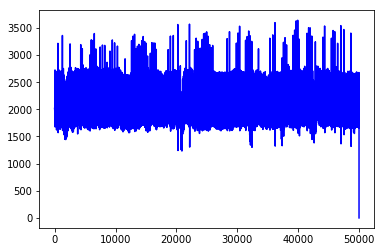

In [13]:
fig = plt.figure()
ax  = fig.add_subplot(111)

plt.plot(data_ECG, linestyle='-', color='b')

The first observation is that the very last reading does not correspond to the ECG, it is a zero when the rest of the values are in the range of 2000-3,500. Let's discard that with a pop

In [23]:
data_ECG2 = data_ECG[0:data_ECG.size-1]

In [24]:
len(data_ECG2)

50000

### Zooming in

As it is evident from the graph, the number of samples can make it difficult to observe the detail of each heart cycle. We can zoom in in several ways, but first, let's plot again without the discarded value:

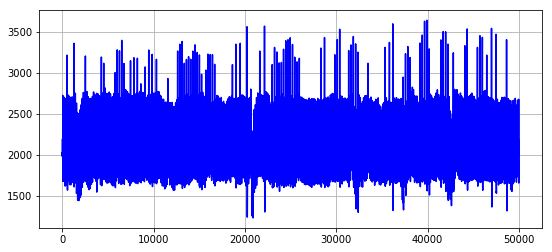

In [27]:
fig = plt.figure(figsize=(9, 4))
ax2  = fig.add_subplot(111)

plt.plot(data_ECG2, linestyle='-', color='b')
plt.grid()

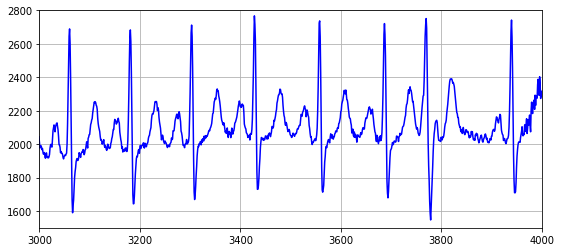

In [30]:
ax2.set_xlim(3000,4000)
ax2.set_ylim(1500,2800)
fig

### Work for you

Explore the ECG, you can modify the values on the command 'axis' or use the zoom in the window. Does the ECG looks the same everywhere? Why would it look different?

### Detecting peaks of an ECG by thresholding

One interesting and simple exercise with this signal is to detect the peaks of each cycle. A simple attempt would be to detect regions of the signal that exceed a certain value. For instance, we can set a threshold (arbitrarily) at 2400, and generate a new signal from the comparison of the ecg against the threshold:

In [32]:
peaks_1 = data_ECG>2400

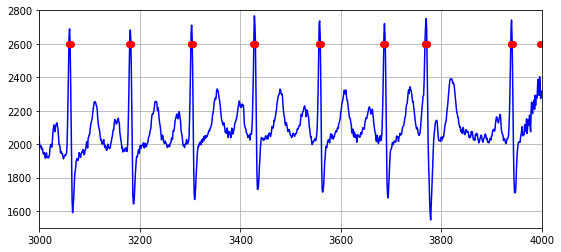

In [34]:
ax2.plot(2600*peaks_1, linestyle='', marker='o', color='r')
fig

Notice that we had to multiply the peaks by 2,600 so that they appear in the same location of the vertical axis as the ECG. 

### Work for you



Change the value of the threshold (2400) to other values, what happens? Do you detect more or less peaks?

### Size of the Peak


 If we look closely we can spot a problem

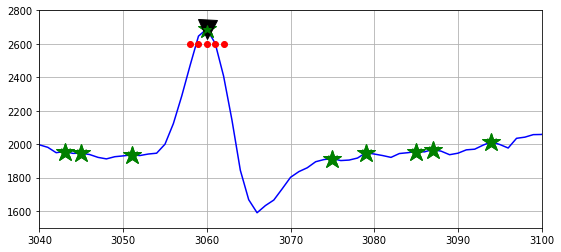

In [63]:
ax2.set_xlim(3040,3100)
fig

The threshold is providing with a value for *every single place* where the signal exceed the given value, which is not exactly the same as detecting a peak. Fortunately Python Scipy has a function (always check to see if Python or one of its multiple libraries has a function for what you want) to detect peaks called 'find_peaks', which is used like this:

In [55]:
peaks_2,_ = signal.find_peaks(data_ECG2)

Let's see how many peaks this has detected:

In [56]:
len(peaks_2)

8220

Again, the best thing is to visualise the results:

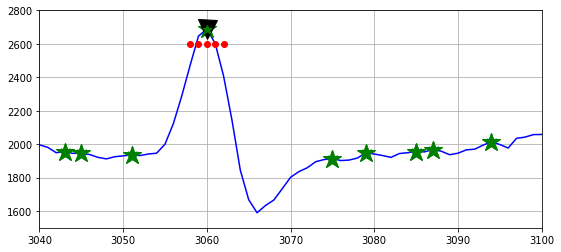

In [65]:
ax2.plot(peaks_2,data_ECG2[peaks_2], linestyle='', marker='*', color='g',markersize=5)
fig

Notice that there seems to be an awful large number of "peaks" where there should not be any peaks. This is a good example of the specific nature of some processing techniques. The finding of peaks is detecting ANY point which is higher than its neighbours, which is of course different of what we are trying to detect, which in turn leads to the question, which "peaks" are the ones we want? 

### Refining the peak detection

OK let's be specific, we want relatively big peaks (not those that are most probably due to noise) and the ones that are sharp and high, which should be closely related to the heart rate. That can be translated into rules like these: peaks that (a) are above a certain level (again 2400 can be a good threshold), (b) are not too close to each other. The second rule may not be immediately clear so let's take one at a time. First, let's discard all peaks that are below the threshold and display:

In [59]:
peaks_3,_ = signal.find_peaks(data_ECG2,height=2400)
len(peaks_3)

451

Ok, a significantly lower number of peaks. Let's see how good they are:

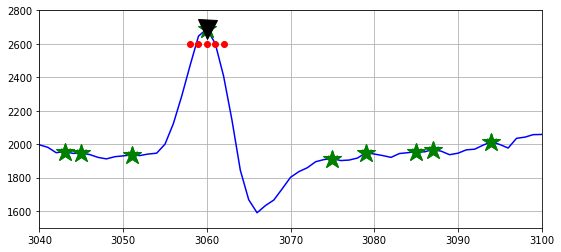

In [60]:
ax2.plot(peaks_3,data_ECG2[peaks_3], linestyle='', marker='v', color='k',markersize=19)
fig

Better, at least in this part of the signal, let's zoom out to check:

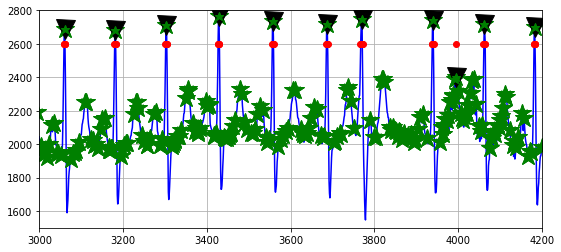

In [67]:
ax2.set_xlim(3000,4200)
fig